### Cost

In [1]:
NUM_NETWORKS = 3
NUM_QUESTIONS = 5
NUM_ROUNDS = 4
NUM_REPEATS = 2
COST_PER_ROUND = 200000 #estimated from cost_per_round sum
dollor_PER_1M_token = 0.150

cost = NUM_NETWORKS * NUM_QUESTIONS * NUM_ROUNDS * NUM_REPEATS * COST_PER_ROUND * dollor_PER_1M_token / 1e6
print(f"Cost: ${cost:.2f}")

Cost: $3.60


# Accuracy vs Compression Rate

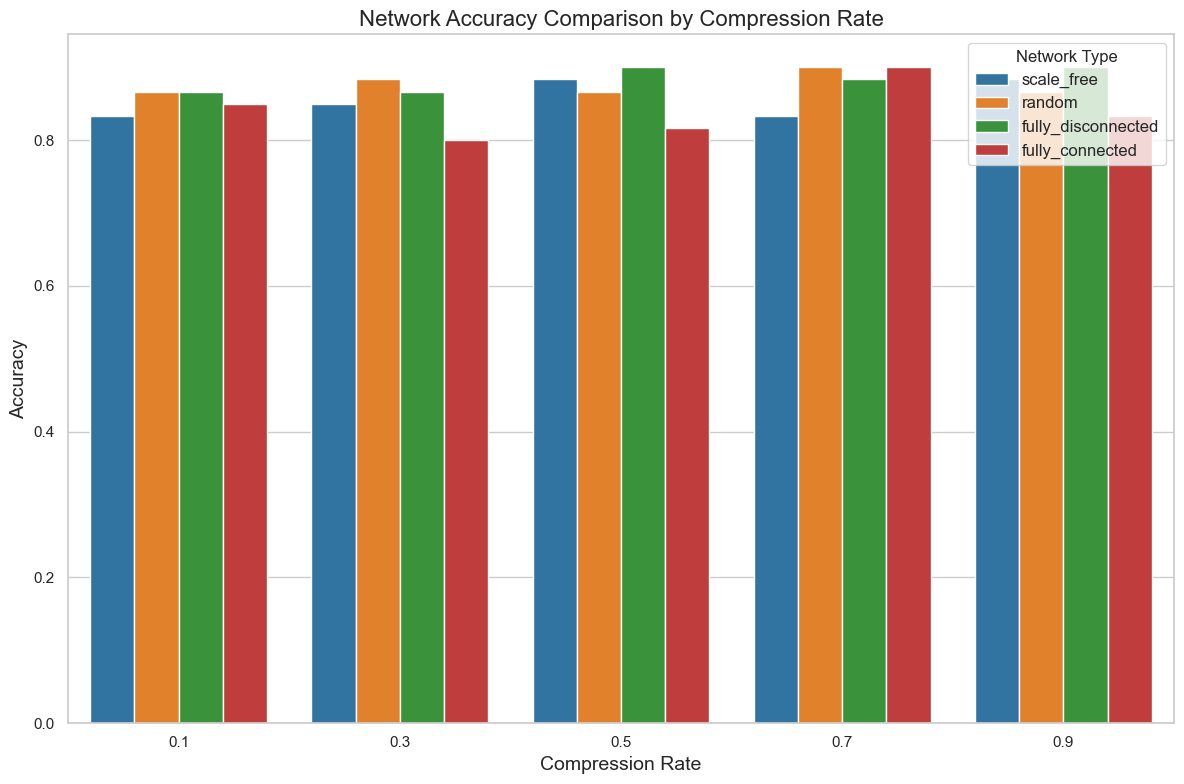

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of compression rates
rates = [0.1, 0.3, 0.5, 0.7, 0.9]

# Generate corresponding directory names for each compression rate
output_dirs = {rate: f"output_{int(rate * 10):02d}" for rate in rates}

# Base directory path
base_dir = "../experiment/outputs"

# List of selected network types
selected_networks = [
    "random",
    "scale_free",
    "fully_disconnected",
    "fully_connected",
]

# List to store data
data = []

# Read CSV files for each compression rate
for rate in rates:
    output_dir = output_dirs[rate]
    csv_path = os.path.join(base_dir, output_dir, "analysis", "results", "accuracy_and_network.csv")

    if not os.path.exists(csv_path):
        print(f"Warning: File does not exist: {csv_path}")
        continue

    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Filter data for selected network types
    filtered_df = df[df['network'].isin(selected_networks)].copy()
    filtered_df['rate'] = rate  # Add compression rate column

    # Select necessary columns
    data.append(filtered_df[['rate', 'network', 'accuracy', 'standard_error']])

# Combine all data
combined_data = pd.concat(data, ignore_index=True)

# Convert 'rate' to a categorical variable to ensure proper ordering and grouping
combined_data['rate'] = pd.Categorical(combined_data['rate'], categories=rates, ordered=True)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=combined_data,
    x='rate',
    y='accuracy',
    hue='network',
    palette='tab10',
    errorbar=None,          # Updated parameter to suppress error bars
    order=rates             # Ensure the compression rates are in the specified order
)

# Setting the title and labels (translated to English)
plt.title('Network Accuracy Comparison by Compression Rate', fontsize=16)
plt.xlabel('Compression Rate', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Customize x-axis ticks to display each compression rate distinctly
plt.xticks(ticks=range(len(rates)), labels=rates)

# Setting the legend
plt.legend(title='Network Type', fontsize=12, title_fontsize=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Uncomment the following line to save the plot as a file
# plt.savefig("accuracy_comparison.png", dpi=300)


# Accuracy vs Compression Rate

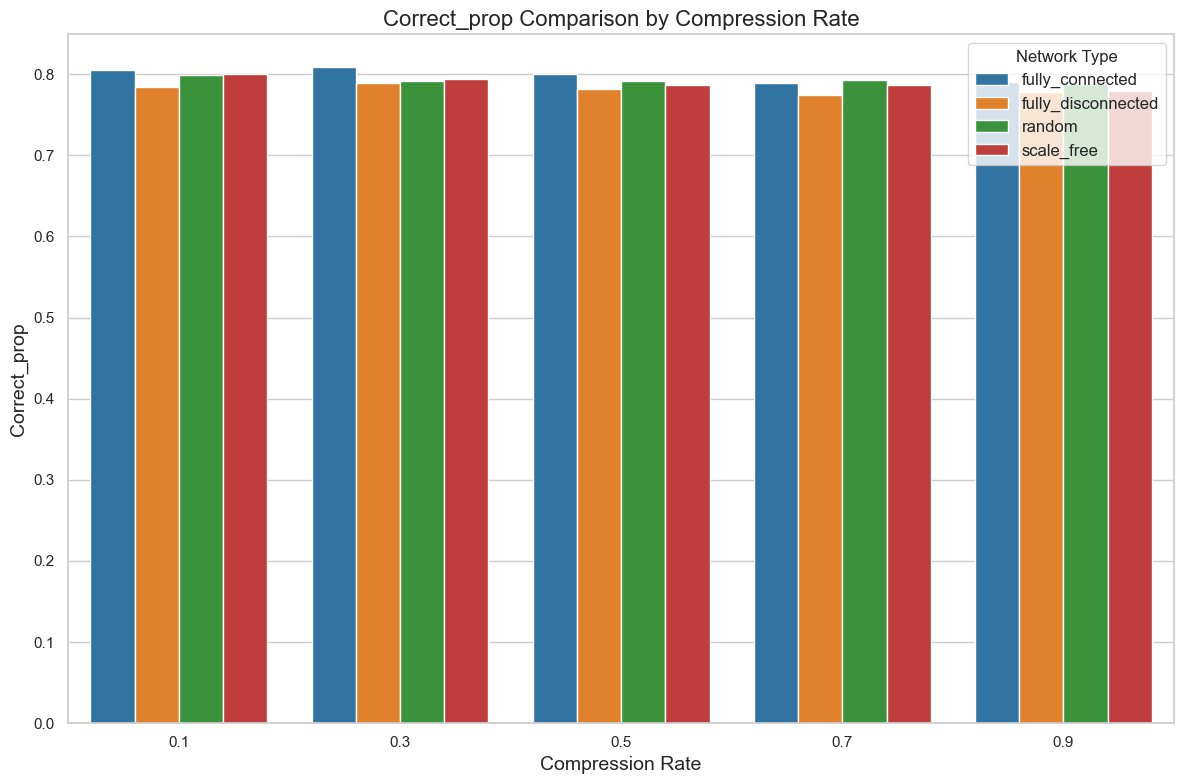

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate corresponding directory names for each compression rate
output_dirs = {rate: f"output_{int(rate * 10):02d}" for rate in rates}

# List to store data
data = []

# Read CSV files for each compression rate
for rate in rates:
    output_dir = output_dirs[rate]
    csv_path = os.path.join(base_dir, output_dir, "analysis", "results", "correct_prop_and_network_type.csv")

    if not os.path.exists(csv_path):
        print(f"Warning: File does not exist: {csv_path}")
        continue

    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Filter data for selected network types
    filtered_df = df[df['network'].isin(selected_networks)].copy()
    filtered_df['rate'] = rate  # Add compression rate column

    # Select necessary columns
    data.append(filtered_df[['rate', 'network', 'correct_prop', 'standard_error']])

# Combine all data
combined_data = pd.concat(data, ignore_index=True)

# Convert 'rate' to a categorical variable to ensure proper ordering and grouping
combined_data['rate'] = pd.Categorical(combined_data['rate'], categories=rates, ordered=True)

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=combined_data,
    x='rate',
    y='correct_prop',
    hue='network',
    palette='tab10',
    errorbar=None,          # Updated parameter to suppress error bars
    order=rates             # Ensure the compression rates are in the specified order
)

# Setting the title and labels (translated to English)
plt.title('Correct_prop Comparison by Compression Rate', fontsize=16)
plt.xlabel('Compression Rate', fontsize=14)
plt.ylabel('Correct_prop', fontsize=14)

# Customize x-axis ticks to display each compression rate distinctly
plt.xticks(ticks=range(len(rates)), labels=rates)

# Setting the legend
plt.legend(title='Network Type', fontsize=12, title_fontsize=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

# Uncomment the following line to save the plot as a file
# plt.savefig("accuracy_comparison.png", dpi=300)


### Data Loading

In [4]:
from datasets import load_dataset
import dotenv
import os

dotenv.load_dotenv("../.env")
hf_token = os.getenv("HF_TOKEN")

def reshape_dataset(df):
    df = df.rename(columns={'question': 'input'})
    df[['A', 'B', 'C', 'D']] = pd.DataFrame(df['choices'].tolist(), index=df.index)
    df['target'] = df['answer'].apply(lambda x: chr(65 + x))
    dataset1_like = df[['input', 'A', 'B', 'C', 'D', 'target']]
    return dataset1_like

dataset1 = load_dataset("lukaemon/mmlu", "high_school_mathematics", revision="3b5949d968d1fbc3facce39769ba00aa13404ffc", trust_remote_code=True, split="test", token = hf_token).to_pandas()
dataset2 = load_dataset("cais/mmlu", "abstract_algebra", split="test", token = hf_token).to_pandas()
dataset2 = reshape_dataset(dataset2)

/opt/homebrew/Caskroom/miniforge/base/envs/llm-networks/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dataset1.head()
dataset2.head()

,input,A,B,C,D,target
0,Find the degree for the given field extension ...,0,4,2,6,B
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B


### Answer Splitting / Parsing

In [6]:
import re

def split_response(response: str):
    """
    response を reasoning と answer に分割します。
    例: "reasoningの部分... Therefore, the correct answer is (C) 50." -> ("reasoningの部分...", "(C) 50")
    """
    # (A|B|C|D) に続く数字をキャプチャ
    pattern = re.compile(r'\(([ABCD])\)\s*(\d+)', re.IGNORECASE)

    # すべてのマッチを取得
    matches = list(pattern.finditer(response))

    if matches:
        # 最後のマッチを取得
        last_match = matches[-1]
        answer = f'({last_match.group(1)}) {last_match.group(2)}'
        # reasoning はマッチの開始位置までの部分
        reasoning = response[:last_match.start()].strip()
        return reasoning, answer
    else:
        # マッチしない場合は全体を reasoning として扱う
        return response, ''

In [7]:
response = " We can use the Pythagorean theorem to find the relationship between the length, width, and diagonal of the rectangle.  So, we have: (x^2) + (2x^2) = (5sqrt(5))^2 3x^2 = 125 x^2 = 125/3 x = sqrt(125/3)  Now, we can find the area of the rectangle by multiplying the length and width: Area = x * 2x = 2x^2 = 2 * (125/3) = 250/3 Therefore, the area of the rectangle is 250/3, which is approximately 83.33. Therefore, the correct answer is (C) 50."
reasoning, answer = split_response(response)
print(f"Reasoning: {reasoning}")
print(f"Answer: {answer}")

Reasoning: We can use the Pythagorean theorem to find the relationship between the length, width, and diagonal of the rectangle.  So, we have: (x^2) + (2x^2) = (5sqrt(5))^2 3x^2 = 125 x^2 = 125/3 x = sqrt(125/3)  Now, we can find the area of the rectangle by multiplying the length and width: Area = x * 2x = 2x^2 = 2 * (125/3) = 250/3 Therefore, the area of the rectangle is 250/3, which is approximately 83.33. Therefore, the correct answer is
Answer: (C) 50
